# Lake model continued - subspace partitioning

In the previous week you used the lake problem as a means of getting acquainted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of the [open exploration tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## 1. Apply scenario discovery

1. Instanciate the model and define its parameters. Use the same parameters as in Assignment 2.
2. Generate 10 policies and 1000 scenarios and evaluate them.
3. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop_columns`*
4. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability

In [4]:
from data.lakemodel_function import lake_problem
from ema_workbench import (
    Model,
    RealParameter,
    ScalarOutcome,
    ema_logging,
    MultiprocessingEvaluator,
    Constraint,
)

# Instantiate the model

model = Model('LAKE', function=lake_problem)
model.time_horizon = 100
# Specify uncertainties
model.uncertainties = [RealParameter('b', 0.1, 0.45),
                       RealParameter('q', 2, 4.5),
                       RealParameter('mean', 0.01, 0.05),
                       RealParameter('stdev', 0.001, 0.005),
                       RealParameter('delta', 0.93, 0.99),
                       ]


# Set levers, one for each time step

model.levers = [RealParameter(f"l{i}",0,0.1) for i in range(model.time_horizon)]


model.outcomes = [
        ScalarOutcome("max_P", kind=ScalarOutcome.MINIMIZE, expected_range=(0, 5)),
        ScalarOutcome("utility", kind=ScalarOutcome.MAXIMIZE, expected_range=(0, 2)),
        ScalarOutcome("inertia", kind=ScalarOutcome.MAXIMIZE, expected_range=(0, 1)),
        ScalarOutcome("reliability", kind=ScalarOutcome.MAXIMIZE, expected_range=(0, 1)),]

In [5]:
# Hint: A great moment to take another look at the examples!
from ema_workbench import MultiprocessingEvaluator
from ema_workbench.em_framework.optimization import HyperVolume, EpsilonProgress
from ema_workbench.em_framework.evaluators import Samplers

n_scenarios = 1000
n_policies = 10

# with MultiprocessingEvaluator(model) as evaluator:
#     experimenents, outcomes = evaluator.perform_experiments(n_scenarios, n_policies, lever_sampling=Samplers.MC)
with MultiprocessingEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=10)

100%|██████████████████████████████████| 10000/10000 [00:05<00:00, 1872.19it/s]


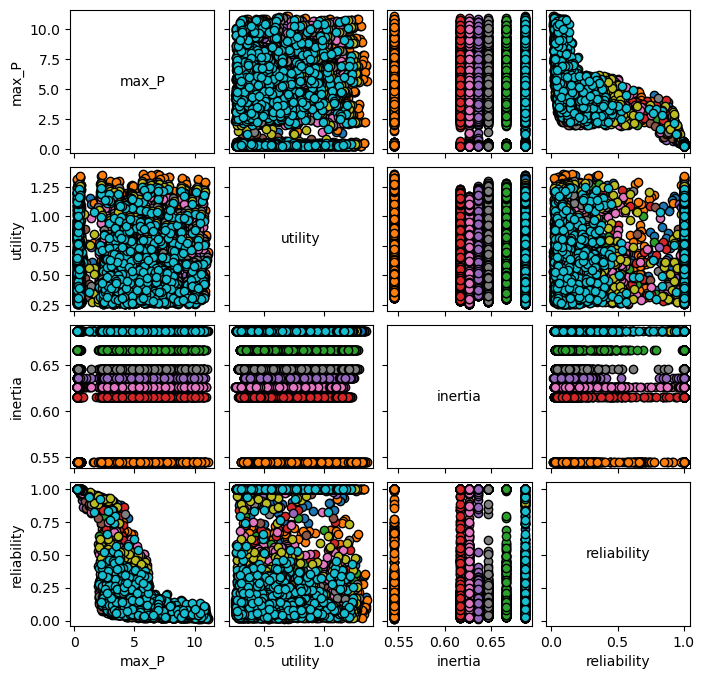

In [8]:
from ema_workbench.analysis import pairs_plotting
from matplotlib import pyplot as plt

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by="policy", legend=False)
fig.set_size_inches(8, 8)
plt.show()

## 2. Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

In [ ]:
experiments
experiments.drop(columns=[f"l{x}" for x in range(0,100)], inplace=True)

KeyError: "['l+0', 'l+1', 'l+2', 'l+3', 'l+4', 'l+5', 'l+6', 'l+7', 'l+8', 'l+9', 'l+10', 'l+11', 'l+12', 'l+13', 'l+14', 'l+15', 'l+16', 'l+17', 'l+18', 'l+19', 'l+20', 'l+21', 'l+22', 'l+23', 'l+24', 'l+25', 'l+26', 'l+27', 'l+28', 'l+29', 'l+30', 'l+31', 'l+32', 'l+33', 'l+34', 'l+35', 'l+36', 'l+37', 'l+38', 'l+39', 'l+40', 'l+41', 'l+42', 'l+43', 'l+44', 'l+45', 'l+46', 'l+47', 'l+48', 'l+49', 'l+50', 'l+51', 'l+52', 'l+53', 'l+54', 'l+55', 'l+56', 'l+57', 'l+58', 'l+59', 'l+60', 'l+61', 'l+62', 'l+63', 'l+64', 'l+65', 'l+66', 'l+67', 'l+68', 'l+69', 'l+70', 'l+71', 'l+72', 'l+73', 'l+74', 'l+75', 'l+76', 'l+77', 'l+78', 'l+79', 'l+80', 'l+81', 'l+82', 'l+83', 'l+84', 'l+85', 'l+86', 'l+87', 'l+88', 'l+89', 'l+90', 'l+91', 'l+92', 'l+93', 'l+94', 'l+95', 'l+96', 'l+97', 'l+98', 'l+99'] not found in axis"